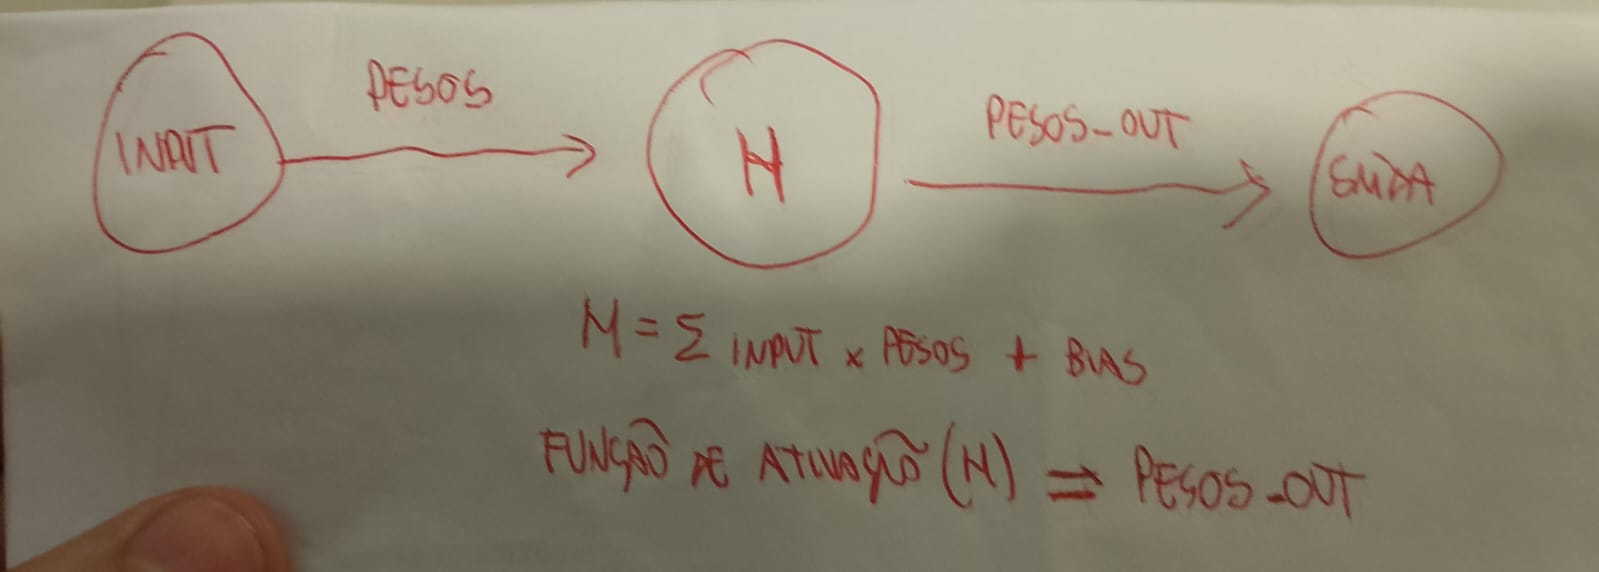

EXTREME MACHINE LEARNING REGRESSION - Sem scikit-learn e sem regularização

In [ ]:
# Cada coluna reperesenta um neuronio de entrada
# Somatorio (entrada x pesos) + bias (viés)

# o EML é uma técnica que consiste onde os  pesos de entrada e os bias da camada escondida são escolhidos aleatoriamente, os pesos da camada de saída são
# Os pesos da camada de saída são determinados analiticamente (minimos quadrados) -> (não há ciclos iterativos para ajuste de parâmetros).
# Foi desenvolvido para redes com apenas duas camadas: a camada de entrada, a camada escondida e acamada de saída ;


import numpy as np
import pandas as pd
import random

data = pd.read_excel('CPU_Performance.xlsx')
data = data.iloc[:,2:] # Excluindo as duas primeiras colunas por falta de relevância na aplicação do modelo (são apenas identificadores)

# Divisão0 das colunas (target e entradas) - No caso desse dataset a última coluna é o nosso target

x_input = data.iloc[:,:-2] # Divisão
x_target = data.iloc[:,-2]

tr = 0.6 # Treinamento - 60%
vl = 0.2 # Validação - 20%
         # Teste - 20%

# Divindindo as linhas do dataset

train_i = int(tr*len(x_input))
valid_i = int(vl*(len(x_input)))

train_input = x_input.iloc[0:train_i,:]
train_target = x_target.iloc[0:train_i]

valid_input = x_input.iloc[train_i:train_i+valid_i,:]
valid_target = x_target.iloc[train_i:train_i+valid_i]

test_input = x_input.iloc[train_i+valid_i:,:]
test_target = x_target.iloc[train_i+valid_i:]

# Reescalando os dados - Calculando o minimo  e o minimo para o target
# Normalização dods dados

(l,cols)=np.shape(train_input)
minmaxs=[]
for i in range(cols): # Percorre todas as colunas do dataset
  min = np.min(train_input.iloc[:,i]) # Seleciona todas as linhas da coluna i e calcula o minimo
  max = np.max(train_input.iloc[:,i]) # Seleciona todas as linhas da coluna i e calcula o minimo
  minmaxs.append([min,max]) # Cria o vetor com todas os minimos e mximo por linha

min_target = np.min(train_target) # Comos o tem uma coluna basta fazer o calculo suando np.max direto
max_target = np.max(train_target)

# (X - min)/(max - min) - Reescala todos os dados para os tres datasets com base nos respectivos minios e maximos de cada coluna-linha

for i in range(cols):
  train_input.iloc[:,i] = (train_input.iloc[:,i]-minmaxs[i][0])/(minmaxs[i][1]-minmaxs[i][0]) # Seleciona todos os valores da primeira coluna e faz o calculo utilizado a lista de lista  minmax[coluna][0] = minimo daqulesa coluna ; minmax[coluna][1] = maximo daquela coluna
  valid_input.iloc[:,i] = (valid_input.iloc[:,i]-minmaxs[i][0])/(minmaxs[i][1]-minmaxs[i][0])
  test_input.iloc[:,i] = (test_input.iloc[:,i]-minmaxs[i][0])/(minmaxs[i][1]-minmaxs[i][0])


train_target = (train_target - min_target)/(max_target-min_target)
valid_target = (valid_target - min_target)/(max_target-min_target)  #Como so tem uma coluna basta fazer o calculo de reescalonamento direto
#test_target = (test_target - min_target)/(max_target-min_target)

(lin,cols) = np.shape(train_input)
#random.seed(10)

def sigmoid(X):   # Função de ativação sigmoide
  return 1/(1+np.exp(-X))


def elm(hidden_neurons,inputs,targets):
  (lin,cols) = np.shape(inputs)
  pesos = np.random.rand(cols,hidden_neurons)  #Seleciona aleatroiamente os pesos da camada de entrada para camada de saída
  bias = np.random.rand(1,hidden_neurons)  # Seleciona aleatoriamente os bias da camada escondida
  bias_adapt = np.ones((lin,1)).dot(bias)   # Bias para cada linha
  H = inputs.dot(pesos)+bias_adapt # H*W=T -> W = H ^-1 * T  -> Calculo da entrada da camada escondida -> Somatorio dos pesos x entradas + bias




  H_inv = np.linalg.pinv(sigmoid(H)) # Aplica minimos quadrados para calcular os pesos de saída
  pesos_out = H_inv.dot(targets)

  return (pesos,bias,pesos_out)

def elm_predict(pesos,bias,pesos_out,inputs):
  (lin,cols) = np.shape(inputs)

  bias_adapt = np.ones((lin,1)).dot(bias)
  H = sigmoid(inputs.dot(pesos)+bias_adapt) # Entrada da camada escondida
  preds = H.dot(pesos_out) # Aplica os pesos de saída    -> Como é uam regressão a saída vai ser os  pesos de saída*entrada da camada escondida H

  return preds

hidden_neurons = [10, 20, 30, 40 ,50] # neuronios escondidos
erro=10**100
for h in hidden_neurons:
  (pesos,bias,pesos_out)=elm(h,train_input,train_target) # Utiliza o target e o inout deles mesmos para calcular os pesos de saída (junto da aleatorização do bias e do pesos da entrada)
  preds_val = elm_predict(pesos,bias,pesos_out,valid_input)  # Calcula a predição com base no conjunto de validação

  mse_val = np.mean((preds_val - valid_target)**2) # Erro médio quadratico
  #print(mse_val)
  if mse_val < erro:  #Armazena a melhor combinação de neuronios que geram o melhor peso, melhor bias e melhor saída
    best_peso,best_bias,best_pesos_out = (pesos,bias,pesos_out)
    erro = mse_val
#test

preds_test = elm_predict(best_peso,best_bias,best_pesos_out,test_input) # Calcula a predição com base na entrada do conjunto de teste

preds_test = preds_test*(max_target-min_target) + min_target  # Reverte a normalização

print('MSE test = %f'%(np.mean((test_target-preds_test)**2))) # Erro quadradtico médio -> valor correto do conjunto teste - valor da predição do conjunto teste
#print(preds_test)
#print(test_target)


FileNotFoundError: [Errno 2] No such file or directory: 'CPU_Performance.xlsx'

#EXTREME MACHINE LEARNING - REGULARIZADO

EML se destaca por ser ter apenas um unica camada escondida, os pesos de saida sao calculados apenas uma vez através de uma transformação

Underfit -> Muito ajustado para os dados de teste e pouco para dados de validação

Overfit -> Muito ajustado para os dados de validação e pouco para dados de teste -> Muito atrelado ás pequenas variações do dados -> Má generalização -> Acuracia treino > Acuracia teste



A regularização é para evitar o Overfiting -> Adiciona hiperparametros para penalizar os pesos -> Minimizar a soma dos erros quadraticos

Lambda 1 (Lasso) -> Limita as informações desnecesárias para zero, excluindo para ajudar na generalização


Lambda 2 (Ridge) -> Tendecia os pesos desnecessários á zero, diminuindo para ajudar na generalização

No teste, ele vai dar uma valor menor mas no treino, ele tende a dar uma valor melhor.

No ELM, a regularização é implementada através da penalização dos pesos durante o processo de treinamento. Isso é feito através da adição de uma matriz diagonal à matriz de H de saída das funções de ativação (ela é multiplicada por ela mesma para poder ser subtraida da amtriz diagonal dos pesos). A matriz diagonal contém valores positivos, geralmente proporcionais ao parâmetro de regularização (lambdaa).

Ao adicionar a matriz diagonal, a regularização aumenta os valores diagonais da matriz de autocorrelação. Isso significa que a autocorrelação entre as funções de ativação de cada neurônio consigo mesma aumenta, o que, por sua vez, penaliza pesos grandes. Consequentemente, a regularização tende a reduzir os valores dos pesos, impedindo que o modelo aprenda relações complexas demais com os dados de treinamento.

In [ ]:
import numpy as np
import pandas as pd
import random

data = pd.read_excel('CPU_Performance.xlsx')
data = data.iloc[:,2:]
x_input = data.iloc[:,:-2]
x_target = data.iloc[:,-1]

tr = 0.6
vl = 0.2

train_i = int(tr*len(x_input))
valid_i = int(vl*(len(x_input)))

train_input = x_input.iloc[0:train_i,:]
train_target = x_target.iloc[0:train_i]

valid_input = x_input.iloc[train_i:train_i+valid_i,:]
valid_target = x_target.iloc[train_i:train_i+valid_i]

test_input = x_input.iloc[train_i+valid_i:,:]
test_target = x_target.iloc[train_i+valid_i:]


# reescalar os dados
(l,cols)=np.shape(train_input)
minmaxs=[]
for i in range(cols):
  min = np.min(train_input.iloc[:,i])
  max = np.max(train_input.iloc[:,i])
  minmaxs.append([min,max])

min_target = np.min(train_target)
max_target = np.max(train_target)

for i in range(cols):
  train_input.iloc[:,i] = (train_input.iloc[:,i]-minmaxs[i][0])/(minmaxs[i][1]-minmaxs[i][0])


  valid_input.iloc[:,i] = (valid_input.iloc[:,i]-minmaxs[i][0])/(minmaxs[i][1]-minmaxs[i][0])


  test_input.iloc[:,i] = (test_input.iloc[:,i]-minmaxs[i][0])/(minmaxs[i][1]-minmaxs[i][0])


train_target = (train_target - min_target)/(max_target-min_target)
valid_target = (valid_target - min_target)/(max_target-min_target)
#test_target = (test_target - min_target)/(max_target-min_target)

(lin,cols) = np.shape(train_input)
random.seed(10)

def sigmoid(X):
  return 1/(1+np.exp(-X))


def elm(hidden_neurons,lambdaa,inputs,targets):
  # lambadaa é a penalidade que ser aaplicada aos pesos
  (lin,cols) = np.shape(inputs)
  pesos = np.random.rand(cols,h)
  bias = np.random.rand(1,h)
  bias_adapt = np.ones((lin,1)).dot(bias)

  H = sigmoid(inputs.dot(pesos)+bias_adapt) # H*W=T -> W = H ^-1 * T
  H_temp = (H.T).dot(H)  #A matriz H_temp é obtida multiplicando a transposta de H pela própria matriz H. Isso é representado como H_temp = (H.T).dot(H).
  # O resultado dessa multiplicação é uma matriz que em sua diagnoal gera os valores dos pesos (tendo em vista que é multiplcação d amatriz H por ela mesma)
  # Funciona como uma correlação entre as colunas
  (linH,colsH) = np.shape(H_temp)
  H_temp =H_temp +np.identity(linH)*lambdaa  # Penalização da matriz dos pesos pela regualrização de ridge L2
  H_inv = np.linalg.inv(H_temp) # Calculo dos pesos de saida por minimos quadrados através dos valores da função de ativação, os minimos qudrados fazem uma aproximaão dos pesos de saída
  pesos_out =H_inv.dot((H.T).dot(targets)) # Calculo dos pesos de saida por minimos quadrados através dos valores da função de ativação
  return (pesos,bias,pesos_out)

def elm_predict(pesos,bias,pesos_out,inputs):
  (lin,cols) = np.shape(inputs)
  bias_adapt = np.ones((lin,1)).dot(bias)
  H = sigmoid(inputs.dot(pesos)+bias_adapt) # H = função de ativação(entrada*pesos + bias)
  preds = H.dot(pesos_out) # Multiplicação pelos pesos de saída calculados previamente
  return preds

hidden_neurons = [10, 20, 30, 40 ,50]
v_lambda = [1000, 100, 10, 1, 0.1, 0.01, 0.001] # Cross valditaion -> Escolha do melhor valor de laambda com base no melhor mse

erro=10**100
for h in hidden_neurons:
  for l in v_lambda:
    (pesos,bias,pesos_out)=elm(h,l,train_input,train_target)
    preds_val = elm_predict(pesos,bias,pesos_out,valid_input)

    mse_val =np.mean((preds_val - valid_target)**2)

    if mse_val <erro:
      best_peso,best_bias,best_pesos_out = (pesos,bias,pesos_out)
      erro=mse_val

#test

preds_test = elm_predict(best_peso,best_bias,best_pesos_out,test_input)
preds_test = preds_test*(max_target-min_target) + min_target
print('MSE test = %f'%(np.mean((test_target-preds_test)**2)))
#print(preds_test)
#print(test_target)

           0          1          2          3          4          5  \
0  46.862625  49.552208  54.525906  45.305622  57.422596  54.910444   
1  49.552208  52.689015  57.803373  48.084191  60.904124  58.170926   
2  54.525906  57.803373  63.967879  52.789546  67.082395  64.294826   
3  45.305622  48.084191  52.789546  44.139481  55.658700  53.138401   
4  57.422596  60.904124  67.082395  55.658700  70.699014  67.518837   
5  54.910444  58.170926  64.294826  53.138401  67.518837  64.857062   
6  47.753735  50.635754  55.634915  46.343246  58.635668  56.021934   
7  53.033930  56.229251  61.840195  51.422363  65.143939  62.260928   
8  58.934452  62.467467  68.971605  57.086347  72.475994  69.446642   
9  57.467976  60.953299  67.114205  55.730381  70.644123  67.560844   

           6          7          8          9  
0  47.753735  53.033930  58.934452  57.467976  
1  50.635754  56.229251  62.467467  60.953299  
2  55.634915  61.840195  68.971605  67.114205  
3  46.343246  51.422363  5